# Assignment - Knock Aiport Weather Data

### Authored by: Stephen Kerr

This assingment is broken down into 2 sections to Plot the data: 

Part 1 - Temperature Plots
- The temperature
- The mean temperature each day
- The mean temperature for each month

Part 2 - Windspeed
- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds (yer I am being nasty here)


This Notebook will be divided into 2 Parts to address each assessment part seperately. But first we will do imports, load the data, explore and clean the data to be ready for analysis.  

The Weather data analysis was gathered from the Irish Storm Centre from **Knock Airport Weather Station**.  
See their website [here](https://cli.fusio.net/cli/stormcenter/index.html).  

## Environment Setup

In [1]:
# Imports 

import pandas as pd 

import matplotlib.pyplot as plt

# used to handle date formatting on plots see https://matplotlib.org/stable/api/dates_api.html 
import matplotlib.dates as mdates 

import os

## Load the data

In [2]:
# Load the data
# first 23 rows are metadata

url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
raw_weather_data = pd.read_csv(url, skiprows=23, index_col=False,)

# output data dir path
output_data_dir = "./assignment06-output-data-assignment06/"

os.makedirs(output_data_dir, exist_ok=True)

raw_weather_data.to_csv(output_data_dir+"raw-weather-data.csv")

C:\Users\kerrs\AppData\Local\Temp\ipykernel_28320\1803174062.py:5: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_weather_data = pd.read_csv(url, skiprows=23, index_col=False,)


## Cleaning the data for analysis

In [3]:
headers = raw_weather_data.columns.tolist()
headers

['date',
 'ind',
 'rain',
 'ind.1',
 'temp',
 'ind.2',
 'wetb',
 'dewpt',
 'vappr',
 'rhum',
 'msl',
 'ind.3',
 'wdsp',
 'ind.4',
 'wddir',
 'ww',
 'w',
 'sun',
 'vis',
 'clht',
 'clamt']

## Dataset Columns 

This information was sourced from the original files metadata.

date:  -  Date and Time (utc)  
rain:  -  Precipitation Amount (mm)  
temp:  -  Air Temperature (C)  
wetb:  -  Wet Bulb Temperature (C)  
dewpt: -  Dew Point Temperature (C)              
rhum:  -  Relative Humidity (%)  
vappr: -  Vapour Pressure (hPa)  
msl:   -  Mean Sea Level Pressure (hPa)  
wdsp:  -  Mean Wind Speed (knot)  
wddir: -  Predominant Wind Direction (degree)  
ww:    -  Synop code for Present Weather  
w:     -  Synop code for Past Weather  
sun:   -  Sunshine duration (hours)  
vis:   -  Visibility (m)  
clht:  -  Cloud height (100's of ft) - 999 if none   
clamt: -  Cloud amount  
ind:   -  Indicator  

### Chaning the data column to the datetime type

In [4]:
# changing the data column to datetime type
# date is in the format 'DD-Mon-YYYY HH:MM' in the UTC timezone

raw_weather_data['date'] = pd.to_datetime(
    raw_weather_data['date'],
    format='%d-%b-%Y %H:%M',
    errors='coerce',
    utc=True
)

## Part 1 - Temperature Plots

- The temperature
- The mean temperature each day
- The mean temperature for each month

### Dropping unnecessary columns from the dataframe for Part 1 Temperature Plots

In [5]:
# Dropping unnecessary columns from the dataframe

drop_headers_list = [
 'ind',
 'rain',
 'ind.1',
 'ind.2',
 'wetb',
 'dewpt',
 'vappr',
 'rhum',
 'msl',
 'ind.3',
 'wdsp',
 'ind.4',
 'wddir',
 'ww',
 'w',
 'sun',
 'vis',
 'clht',
 'clamt']

# dropping the columns
temp_weather_data = raw_weather_data.drop(columns=drop_headers_list)
temp_weather_data.head()

,date,temp
0,1996-04-10 14:00:00+00:00,11.5
1,1996-07-31 08:00:00+00:00,11.5
2,1996-07-31 09:00:00+00:00,11.6
3,1996-07-31 10:00:00+00:00,12.9
4,1996-07-31 11:00:00+00:00,14.5


In [6]:
# checking data types
temp_weather_data.dtypes

date    datetime64[ns, UTC]
temp                float64
dtype: object

In [7]:
## saving the cleaned temperature data to csv
temp_weather_data.to_csv(output_data_dir+"cleaned-temperature-weather-data.csv", index=False)

### First Plot of the Temperature - Hourly Temperature Data

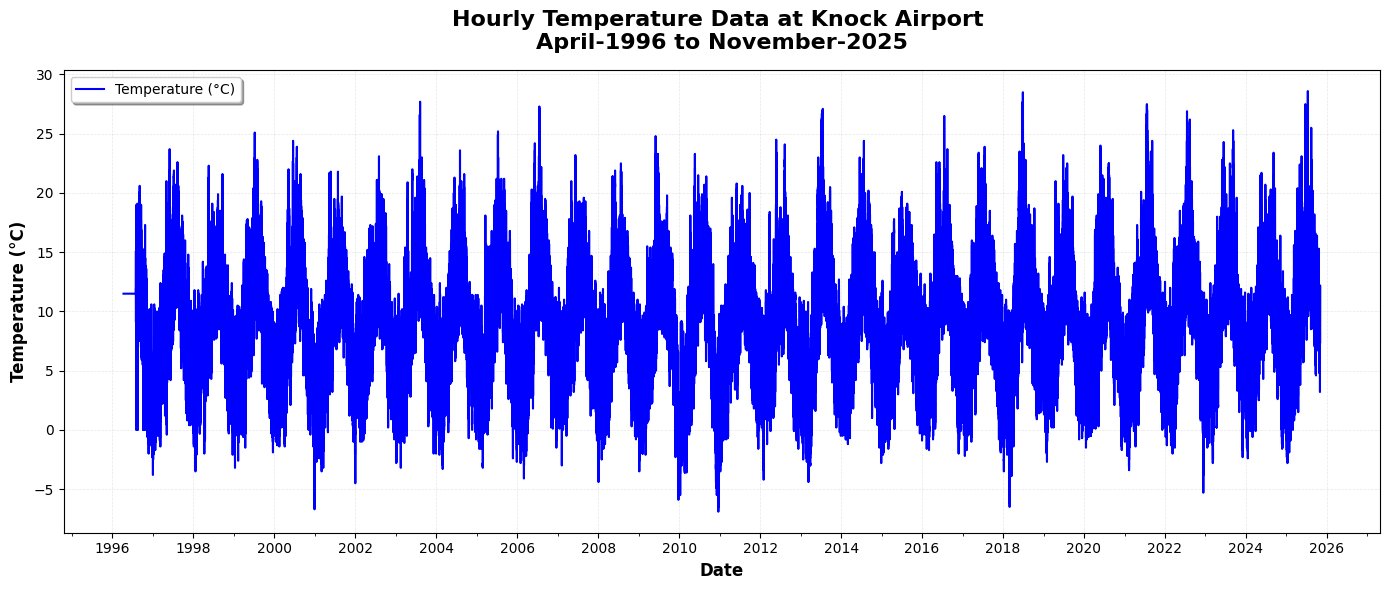

In [8]:
# ploting the temperature data
plt.figure(figsize=(14,6))
plt.plot(temp_weather_data['date'], temp_weather_data['temp'], 
         color='blue', label='Temperature (°C)', linewidth=1.5)
plt.title(f'Hourly Temperature Data at Knock Airport \n' 
          f'{temp_weather_data['date'].min().strftime('%B-%Y')} to '
          f'{temp_weather_data['date'].max().strftime('%B-%Y')}', 
          fontsize=16, fontweight='bold', pad=15)

plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Temperature (°C)', fontsize=12, fontweight='bold')

# formating x-axis for better readability 
ax = plt.gca() # get current axis
ax.xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Just year
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Minor ticks every year

plt.legend(loc='best', frameon=True, shadow=True, fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(output_data_dir+'hourly-temperature-plot.png', dpi=300, bbox_inches='tight')
plt.show()

### Second Plot of the Temperature - The Mean tempeature each day

In [9]:
# calculating the mean temperature each day

# --- Original Code --- but found out about resample method which is better
'''
# extracting date only removing time component to enabe grouping by date
temp_weather_data['date_only'] = temp_weather_data['date'].dt.date 

# grouping by date only and calculating mean temperature
daily_mean_temp = temp_weather_data.groupby('date_only')['temp'].mean().reset_index() 

# converting date_only back to datetime type
daily_mean_temp['date_only'] = pd.to_datetime(daily_mean_temp['date_only'])

daily_mean_temp.head()
'''
# calculating the mean temperature for each day using resample method 
# see documentation here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
daily_mean_temp = temp_weather_data.resample('D', on='date')['temp'].mean().reset_index()
daily_mean_temp.head()

,date,temp
0,1996-04-10 00:00:00+00:00,11.5
1,1996-04-11 00:00:00+00:00,NaN
2,1996-04-12 00:00:00+00:00,NaN
3,1996-04-13 00:00:00+00:00,NaN
4,1996-04-14 00:00:00+00:00,NaN


In [10]:
daily_mean_temp.dtypes

date    datetime64[ns, UTC]
temp                float64
dtype: object

In [11]:
# saving the daily mean temperature data to csv
daily_mean_temp.to_csv(output_data_dir+"daily-mean-temperature-weather-data.csv", index=False)

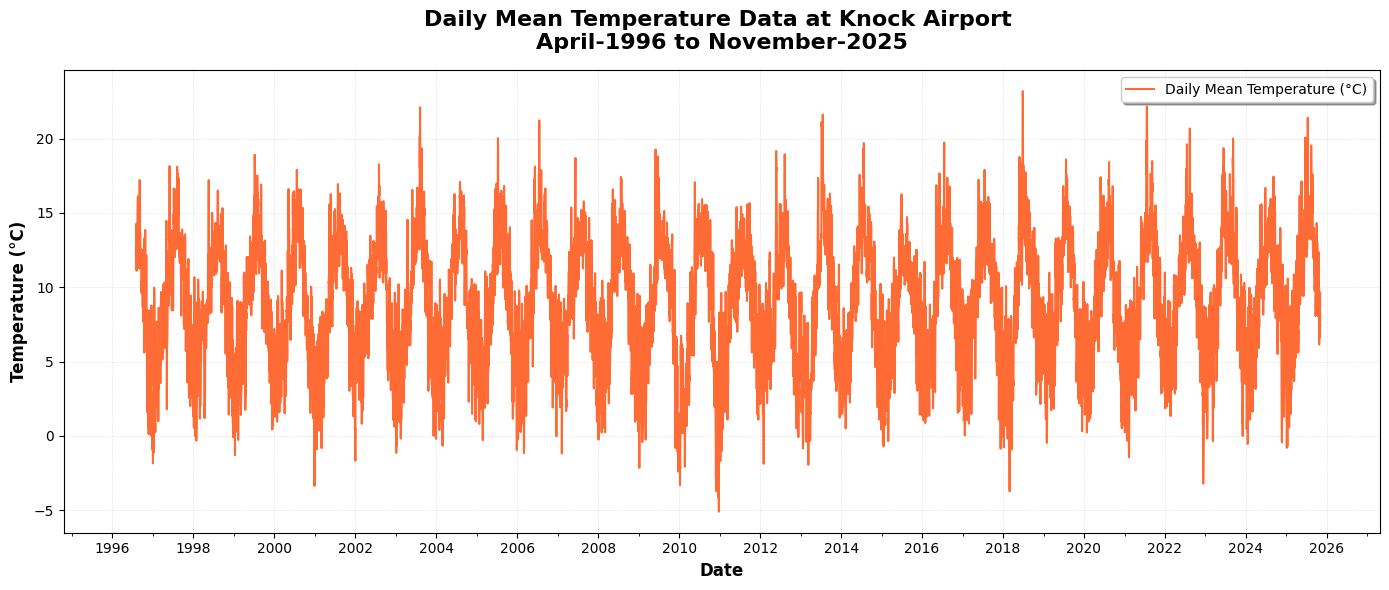

In [13]:
# Ploting the daily mean temperature data
plt.figure(figsize=(14,6))
plt.plot(daily_mean_temp['date'], daily_mean_temp['temp'], 
         color='#FF6B35', label='Daily Mean Temperature (°C)', linewidth=1.5)
plt.title(f'Daily Mean Temperature Data at Knock Airport \n' 
          f'{daily_mean_temp['date'].min().strftime('%B-%Y')} to '
          f'{daily_mean_temp['date'].max().strftime('%B-%Y')}', 
          fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Temperature (°C)', fontsize=12, fontweight='bold')

# formating x-axis for better readability 
ax = plt.gca() # get current axis
ax.xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Just year
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Minor ticks every year


plt.legend(loc='best', frameon=True, shadow=True, fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(output_data_dir+'daily-mean-temperature-plot.png', dpi=300, bbox_inches='tight')
plt.show()


### Thrid Plot of the Temperature - The Mean tempeature for each Month

In [ ]:
# calculating the mean temperature for each month
monthly_mean_temp = temp_weather_data.resample('ME', on='date')['temp'].mean().reset_index()
monthly_mean_temp.head()

## Part 2

## End